In [63]:
import pandas as pd
from pandas.plotting import autocorrelation_plot
 
from pytrends.request import TrendReq
import matplotlib.pyplot as plt

import sys
sys.path.append('./scripts')

%load_ext autoreload
%autoreload 2
from train1 import train

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [64]:
sells_ts = pd.read_csv('./data/sells_time_series.csv', index_col=0)
sells_ts.index = pd.to_datetime(sells_ts.index)

In [118]:
results = train('lampa', sells_ts)

Fitting lasso...
Lasso training RMSE: 0.014779304516597862
Fitting XGBoost...
XGBoost training RMSE: 0.00048510340924353627


In [140]:
sells = results['sells']

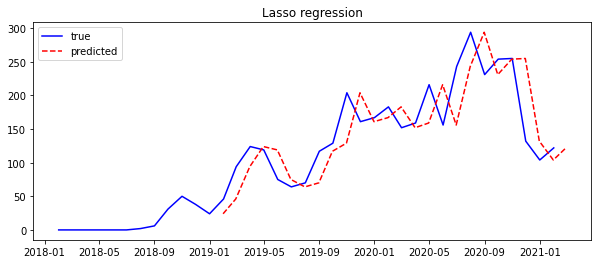

In [141]:
preds = results['preds']['lasso']

plt.figure(figsize=(10,4))
plt.plot(sells.index, sells, color='blue', label='true')
plt.plot(preds.index, preds, linestyle = '--', color='red', label='predicted')
plt.title('Lasso regression')
plt.legend()
plt.show()

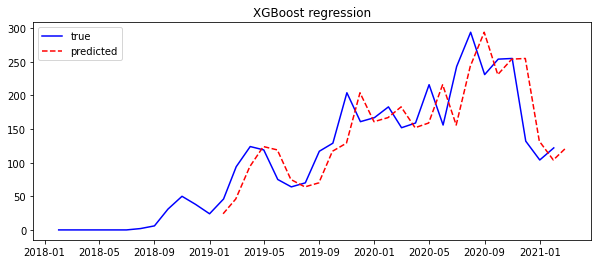

In [114]:
preds = results['preds']['xgb']

plt.figure(figsize=(10,4))
plt.plot(sells.index, sells, color='blue', label='true')
plt.plot(preds.index, preds, linestyle = '--', color='red', label='predicted')
plt.title('XGBoost regression')
plt.legend()
plt.show()

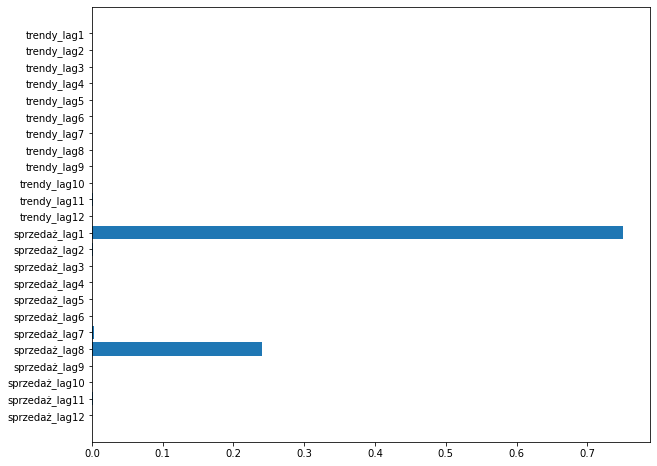

In [139]:
plt.figure(figsize=(10,8))
plt.barh(range(24), results['models']['xgb'].feature_importances_, tick_label = results['dataframe'].columns[2:])
plt.show()

In [132]:
results['dataframe']

,Data,sprzedaż,sprzedaż_lag12,sprzedaż_lag11,sprzedaż_lag10,sprzedaż_lag9,sprzedaż_lag8,sprzedaż_lag7,sprzedaż_lag6,sprzedaż_lag5,...,trendy_lag10,trendy_lag9,trendy_lag8,trendy_lag7,trendy_lag6,trendy_lag5,trendy_lag4,trendy_lag3,trendy_lag2,trendy_lag1
0,2019-01-01,24,0,0,0,0,0,0,2,6,...,256,180,195,279,236,284,256,294,358,263
1,2019-02-01,46,0,0,0,0,0,2,6,31,...,180,195,279,236,284,256,294,358,263,237
2,2019-03-01,94,0,0,0,0,2,6,31,50,...,195,279,236,284,256,294,358,263,237,305
3,2019-04-01,124,0,0,0,2,6,31,50,38,...,279,236,284,256,294,358,263,237,305,218
4,2019-05-01,119,0,0,2,6,31,50,38,24,...,236,284,256,294,358,263,237,305,218,213
5,2019-06-01,75,0,2,6,31,50,38,24,46,...,284,256,294,358,263,237,305,218,213,245
6,2019-07-01,64,2,6,31,50,38,24,46,94,...,256,294,358,263,237,305,218,213,245,230
7,2019-08-01,70,6,31,50,38,24,46,94,124,...,294,358,263,237,305,218,213,245,230,248
8,2019-09-01,117,31,50,38,24,46,94,124,119,...,358,263,237,305,218,213,245,230,248,323
9,2019-10-01,129,50,38,24,46,94,124,119,75,...,263,237,305,218,213,245,230,248,323,266
